## 支持向量机
### 一、最初的线性支持向量机（LinearSVC）：
`scikit-learn`中的`LinearSVC`是用于线性分类的支持向量机算法实现。

**主要特点和参数**：

- **线性分类**：专门设计用于解决线性可分和近似线性可分的分类问题。与使用核函数的支持向量机分类器（如`SVC(kernel='rbf')`等）不同，它直接寻找一个线性决策边界来划分不同的类别。

- **参数**：
  - `penalty`：正则化项，可以是'`l1`'或'`l2`'。'`l2`'正则化（默认值）倾向于使权重向量的各个元素都较小，而'`l1`'正则化可能导致稀疏的权重向量，即某些特征的权重为零，这在特征选择中有一定作用。
  - `loss`：损失函数类型，默认为'squared_hinge'，也可以是'`hinge`'。这决定了优化的目标函数形式。
  - `C`：正则化参数，是一个大于零的浮点数。较小的`C`值允许更多的误分类错误，即更软的间隔；较大的`C`值则对误分类的惩罚更严厉，试图使所有样本都被正确分类，即更硬的间隔。

**优势**：

- **速度快**：在处理大规模数据集时，通常比使用核函数的支持向量机分类器更快，因为它不需要计算核矩阵，避免了高维度的计算开销。

- **可解释性**：由于是线性模型，其决策边界相对简单，权重向量可以提供一定的特征重要性信息，具有较好的可解释性。

**局限性**：

- **仅适用于线性问题**：如果数据是非线性可分的，其性能可能不如使用核函数的支持向量机分类器。

例如，以下是使用`LinearSVC`进行分类的示例代码：

```python
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train, y_train)

print("Accuracy:", clf.score(X_test, y_test))
```

### 如何设置较硬的间隔

在`LinearSVC`中，可以通过调整参数`C`来设置较硬的间隔。

较大的`C`值会使得模型倾向于寻找一个能够将所有训练样本正确分类的决策边界，从而产生较硬的间隔。

以下是示例代码：

```python
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 设置较大的 C 值以获得较硬的间隔
clf = LinearSVC(C=1000)
clf.fit(X_train, y_train)

print("Accuracy:", clf.score(X_test, y_test))
```

在实际应用中，可以通过交叉验证等方法来选择合适的`C`值，以平衡模型的泛化能力和对训练数据的拟合程度。如果`C`值过大，可能会导致过拟合。

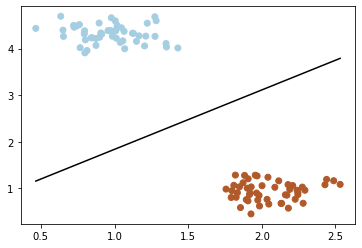

In [1]:
# 创建线性支持向量机
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

# 生成数据集
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.2)
y[y == 0] = -1

# 创建线性支持向量机模型
svm_linear = LinearSVC(C=10)

# 训练模型
svm_linear.fit(X, y)

# 绘制数据点和决策边界
def plot_svm(X, y, svm):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # 绘制决策边界
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
    yy = a * xx - (svm.intercept_[0]) / w[1]
    plt.plot(xx, yy, color='black')
    plt.show()

plot_svm(X, y, svm_linear)

### 以下是使用scikit-learn库中的线性支持向量机（LinearSVC）在硬间隔线性可分数据集、软间隔线性可分数据集和环形数据集上进行测试的代码：

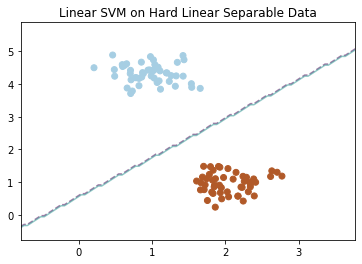

C:\Users\HaoHa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


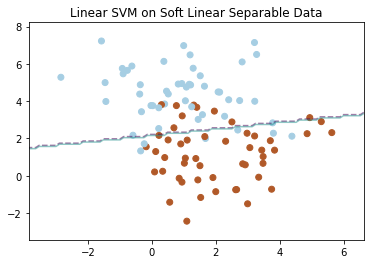

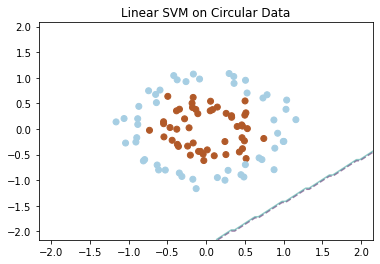

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# 可以调整参数cluster_std来控制两类实例的混杂程度
# 生成硬间隔线性可分数据集
X_hard, y_hard = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.3)
y_hard[y_hard == 0] = -1

# 生成软间隔线性可分数据集
X_soft, y_soft = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.5)
y_soft[y_soft == 0] = -1

# 生成环形数据集
X_circle, y_circle = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
y_circle[y_circle == 0] = -1

def plot_data_and_decision_boundary(X, y, model, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.title(title)
    plt.show()

# 线性支持向量机，这里通过设置较大的C值来模拟硬间隔支持向量机，较大的C值使得模型不容许误分类，即，要求找到硬间隔，
# 较大的C值在图2会报错，可自行测试
linear_svm = LinearSVC(C=10)

# 在硬间隔线性可分数据集上测试
plot_data_and_decision_boundary(X_hard, y_hard, linear_svm, "Linear SVM on Hard Linear Separable Data")

# 在软间隔线性可分数据集上测试
plot_data_and_decision_boundary(X_soft, y_soft, linear_svm, "Linear SVM on Soft Linear Separable Data")

# 在环形数据集上测试（效果可能不好，因为线性模型不适合环形数据）
plot_data_and_decision_boundary(X_circle, y_circle, linear_svm, "Linear SVM on Circular Data")

### 当设置较大的C时会出现的情况

**C:\Users\HaoHa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "**

这个警告表示在使用 `LinearSVC`（基于 liblinear 实现）时，模型在训练过程中没有收敛。

可以尝试以下几种方法来解决这个问题：

1. 增加迭代次数：
   - 通过设置 `LinearSVC` 的 `max_iter` 参数来增加迭代次数。默认值通常是 1000，可以尝试增加到一个更大的值，例如 `max_iter=5000`。

```python
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LinearSVC(C=1000, max_iter=5000)
clf.fit(X_train, y_train)

print("Accuracy:", clf.score(X_test, y_test))
```

2. 调整 `C` 值：
   - 尝试减小 `C` 值，因为较大的 `C` 值可能使问题更难收敛。可以逐步减小 `C` 值并观察模型的收敛情况。

3. 检查数据：
   - 确保数据没有异常值或噪声，这些可能会影响模型的收敛性。可以考虑进行数据预处理，如标准化数据或去除异常值。

4. 尝试其他算法或库：
   - 如果问题仍然存在，可以考虑使用其他支持向量机实现或不同的分类算法来解决问题。

### 二、引入松弛变量的线性支持向量机（LinearSVC with C parameter）：


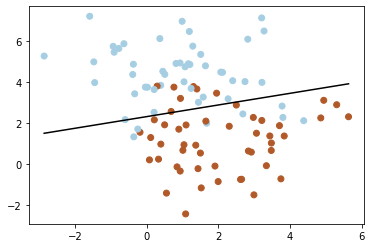

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

# 生成数据集
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.5)
y[y == 0] = -1

# 创建带松弛变量的线性支持向量机模型
svm_linear_relaxed = LinearSVC(C=0.5)  # 较小的 C 允许一定程度的误分类

# 训练模型
svm_linear_relaxed.fit(X, y)

# 绘制数据点和决策边界
def plot_svm(X, y, svm):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # 绘制决策边界
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
    yy = a * xx - (svm.intercept_[0]) / w[1]
    plt.plot(xx, yy, color='black')
    plt.show()

plot_svm(X, y, svm_linear_relaxed)

### 以下是使用scikit-learn库中的线性支持向量机（LinearSVC）并设置松弛变量（软间隔）在不同数据集上进行测试的代码：

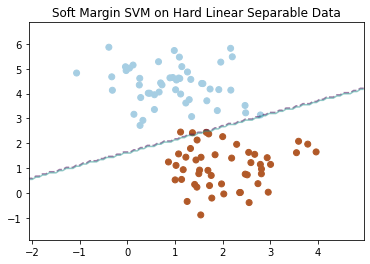

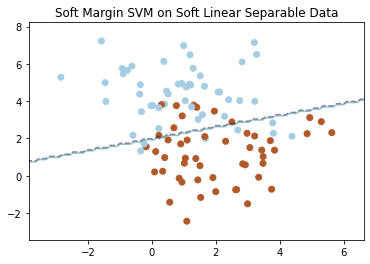

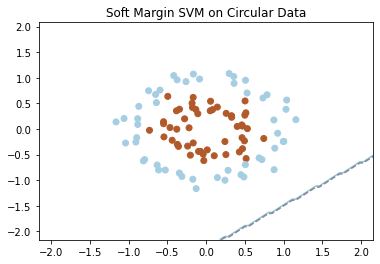

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# 生成硬间隔线性可分数据集
X_hard, y_hard = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
y_hard[y_hard == 0] = -1

# 生成软间隔线性可分数据集
X_soft, y_soft = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.5)
y_soft[y_soft == 0] = -1

# 生成环形数据集
X_circle, y_circle = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
y_circle[y_circle == 0] = -1

def plot_data_and_decision_boundary(X, y, model, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.title(title)
    plt.show()

# 引入松弛变量的线性支持向量机
soft_margin_svm = LinearSVC(penalty='l2', loss='squared_hinge', C=0.5)

# 在硬间隔线性可分数据集上测试
plot_data_and_decision_boundary(X_hard, y_hard, soft_margin_svm, "Soft Margin SVM on Hard Linear Separable Data")

# 在软间隔线性可分数据集上测试
plot_data_and_decision_boundary(X_soft, y_soft, soft_margin_svm, "Soft Margin SVM on Soft Linear Separable Data")

# 在环形数据集上测试（效果可能不好，因为线性模型不适合环形数据）
plot_data_and_decision_boundary(X_circle, y_circle, soft_margin_svm, "Soft Margin SVM on Circular Data")

### 三、引入核函数的支持向量机（SVC with RBF kernel）：


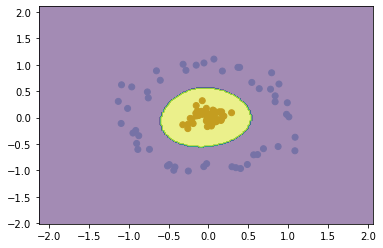

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# 生成数据集
X, y = make_circles(n_samples=100, factor=.1, noise=.1)
y[y == 0] = -1

# 创建带核函数的支持向量机模型
svm_rbf = SVC(kernel='rbf')

# 训练模型
svm_rbf.fit(X, y)

# 绘制数据点和决策边界
def plot_svm(X, y, svm):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # 绘制决策边界
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.show()

plot_svm(X, y, svm_rbf)

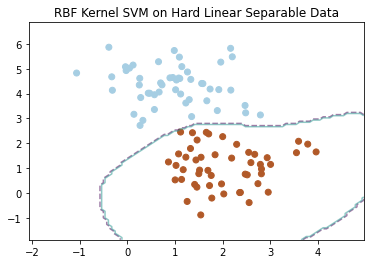

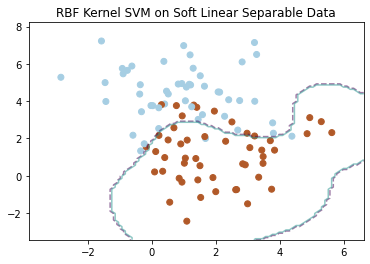

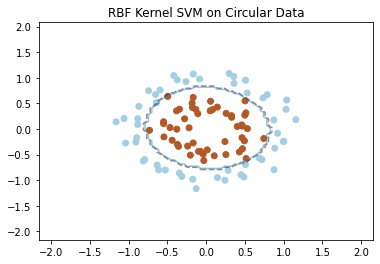

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 生成硬间隔线性可分数据集
X_hard, y_hard = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
y_hard[y_hard == 0] = -1

# 生成软间隔线性可分数据集
X_soft, y_soft = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.5)
y_soft[y_soft == 0] = -1

# 生成环形数据集
X_circle, y_circle = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
y_circle[y_circle == 0] = -1

def plot_data_and_decision_boundary(X, y, model, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.title(title)
    plt.show()

# 引入核函数的支持向量机（使用 RBF 核）
rbf_kernel_svm = SVC(kernel='rbf', gamma=0.5)

# 在硬间隔线性可分数据集上测试
plot_data_and_decision_boundary(X_hard, y_hard, rbf_kernel_svm, "RBF Kernel SVM on Hard Linear Separable Data")

# 在软间隔线性可分数据集上测试
plot_data_and_decision_boundary(X_soft, y_soft, rbf_kernel_svm, "RBF Kernel SVM on Soft Linear Separable Data")

# 在环形数据集上测试
plot_data_and_decision_boundary(X_circle, y_circle, rbf_kernel_svm, "RBF Kernel SVM on Circular Data")

##### 修订输出图示

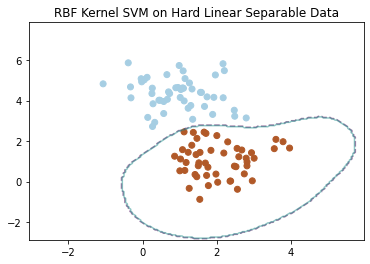

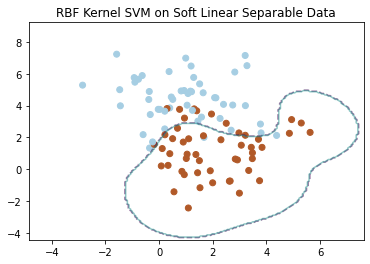

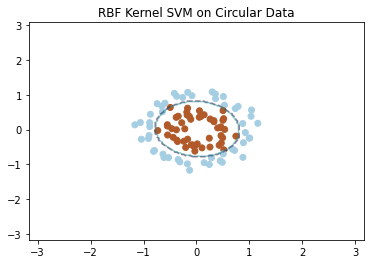

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 生成硬间隔线性可分数据集
X_hard, y_hard = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
y_hard[y_hard == 0] = -1

# 生成软间隔线性可分数据集
X_soft, y_soft = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.5)
y_soft[y_soft == 0] = -1

# 生成环形数据集
X_circle, y_circle = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
y_circle[y_circle == 0] = -1

def plot_data_and_decision_boundary(X, y, model, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # 扩大范围以确保完整显示决策边界
    x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
    y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # 设置坐标轴范围
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.title(title)
    plt.show()

# 引入核函数的支持向量机（使用 RBF 核）
rbf_kernel_svm = SVC(kernel='rbf', gamma=0.5)

# 在硬间隔线性可分数据集上测试
plot_data_and_decision_boundary(X_hard, y_hard, rbf_kernel_svm, "RBF Kernel SVM on Hard Linear Separable Data")

# 在软间隔线性可分数据集上测试
plot_data_and_decision_boundary(X_soft, y_soft, rbf_kernel_svm, "RBF Kernel SVM on Soft Linear Separable Data")

# 在环形数据集上测试
plot_data_and_decision_boundary(X_circle, y_circle, rbf_kernel_svm, "RBF Kernel SVM on Circular Data")

##### 使用不同的核函数在环形数据集上进行实验

<ipython-input-17-28a0b5562933>:24: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5,


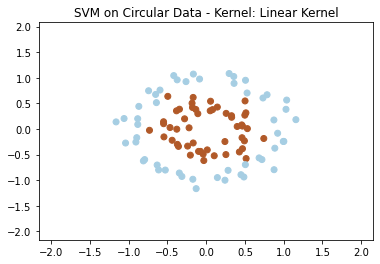

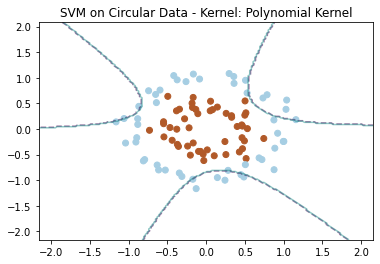

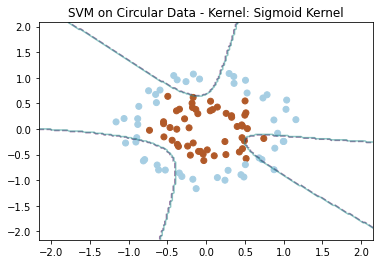

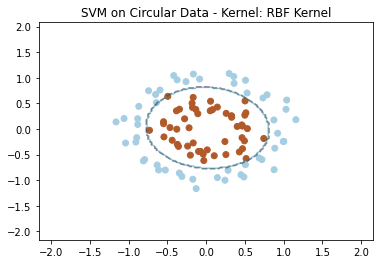

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 生成环形数据集
X_circle, y_circle = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
y_circle[y_circle == 0] = -1

def plot_data_and_decision_boundary(X, y, model, title, kernel_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(f"{title} - Kernel: {kernel_name}")
    plt.show()

# 使用不同的核函数进行测试
kernels = [
    ('Linear Kernel', SVC(kernel='linear')),
    ('Polynomial Kernel', SVC(kernel='poly', degree=3)),
    ('Sigmoid Kernel', SVC(kernel='sigmoid')),
    ('RBF Kernel', SVC(kernel='rbf', gamma=0.5))
]

for kernel_name, model in kernels:
    plot_data_and_decision_boundary(X_circle, y_circle, model, "SVM on Circular Data", kernel_name)

#### 三种支持向量机分别在三种数据集上进行测试

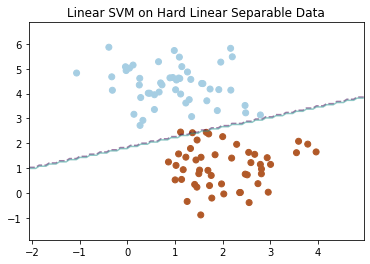

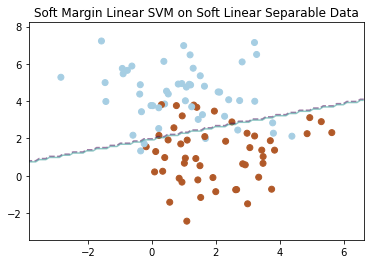

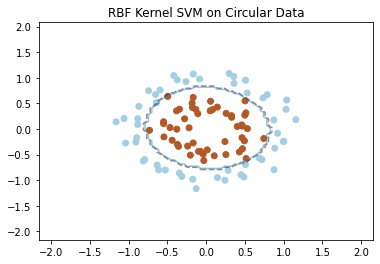

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split

# 生成硬间隔线性可分数据集
X_hard, y_hard = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
y_hard[y_hard == 0] = -1

# 生成软间隔线性可分数据集
X_soft, y_soft = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.5)
y_soft[y_soft == 0] = -1

# 生成环形数据集
X_circle, y_circle = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
y_circle[y_circle == 0] = -1

def plot_data_and_decision_boundary(X, y, model, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.title(title)
    plt.show()

# 线性支持向量机（硬间隔线性可分数据集）
linear_svm_hard = LinearSVC()
plot_data_and_decision_boundary(X_hard, y_hard, linear_svm_hard, "Linear SVM on Hard Linear Separable Data")

# 引入松弛变量的线性支持向量机（软间隔线性可分数据集）
linear_svm_soft = LinearSVC(penalty='l2', loss='squared_hinge', C=0.5)
plot_data_and_decision_boundary(X_soft, y_soft, linear_svm_soft, "Soft Margin Linear SVM on Soft Linear Separable Data")

# 引入核函数的支持向量机（环形数据集）
rbf_svm = SVC(kernel='rbf', gamma=0.5)
plot_data_and_decision_boundary(X_circle, y_circle, rbf_svm, "RBF Kernel SVM on Circular Data")